# Linear Regression example

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Evaluation of models
from sklearn.metrics import mean_squared_error, r2_score

# Model implementation
from sklearn.linear_model import LinearRegression

# Load data (from a dataset in sklearn)
from sklearn.datasets import fetch_california_housing

# Save models into a file!
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Obtain data
data = fetch_california_housing()

# See what can we do
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
# Obtain a description
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["median_house_value"] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


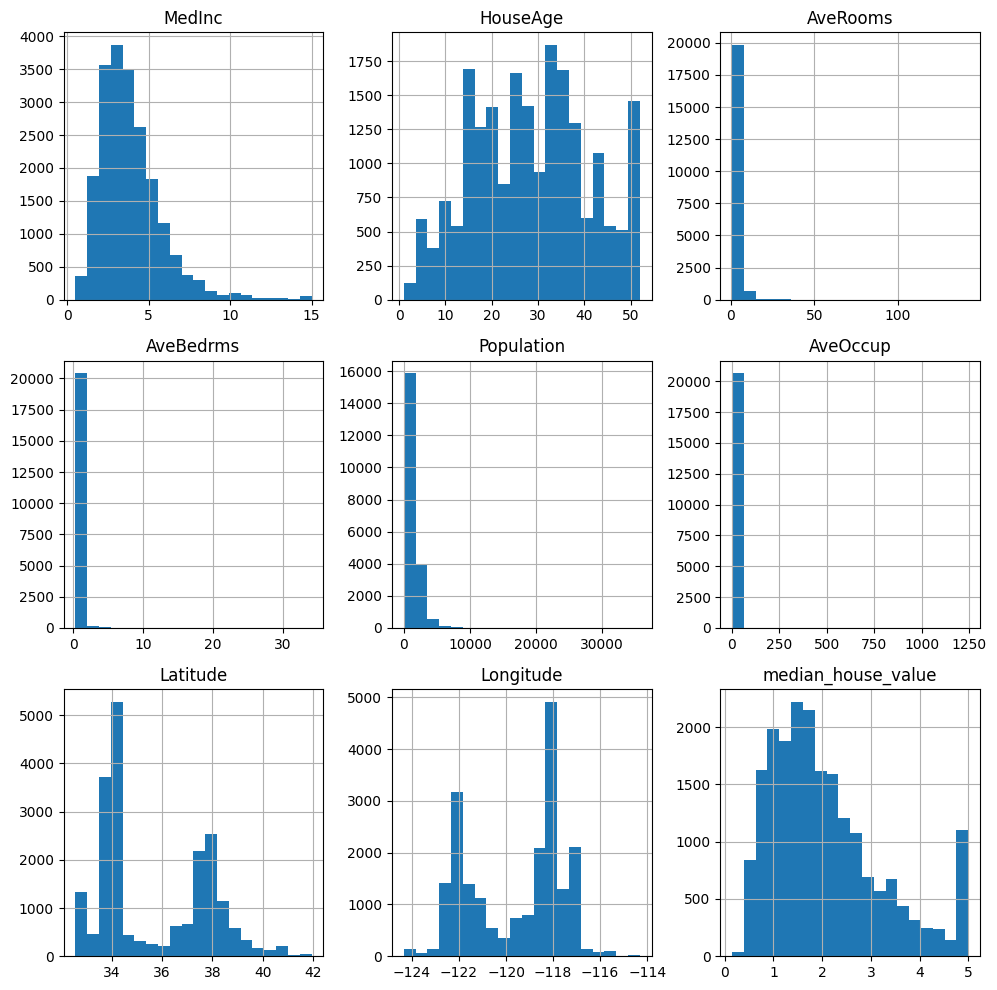

In [5]:
df.hist(bins=20, figsize=(10,10))
plt.tight_layout()

# First Model: 

In [6]:
# Select some features
X = df[["MedInc","HouseAge"]]
Y = df["median_house_value"]

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [10]:
# Create an instance of the Linear Regression model
reg = LinearRegression(fit_intercept=True, copy_X=True)

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)

LinearRegression()

In [11]:
# Determine the coeficients of the model
reg.coef_
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])



,Coeficients
MedInc,0.431509
HouseAge,0.017173


In [12]:
# Determine the intecept of the model
reg.intercept_
pd.DataFrame([reg.intercept_], columns =["Intercept"])

,Intercept
0,-0.093104


In [13]:
#y = 0.431509*MedInc + 0.017173*HouseAge + -0.093104

In [14]:
# Now that the model has been trained, we can make predictions
predictions = reg.predict(X_test)

In [15]:
# To determine the performance of the model we can use some metrics

# Square root of the mean squared error:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to one the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.8158350049867046
Determination Coeficient 0.5045069388606385


In [16]:
# Save the model into a file 
with open("linear_regression_model_1.pkl","wb") as f:
    pickle.dump(reg,f)
    
# to use the model later, one can do:
#with open("linear_regression_model.pkl","rb") as f:
#    model = pickle.load(f)

In [27]:
%matplotlib inline

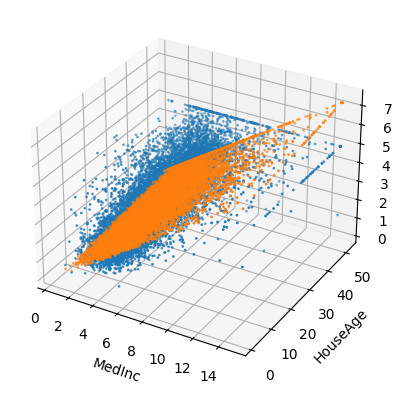

In [28]:
# 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X.MedInc,X.HouseAge, Y, s=1)
ax.scatter(X.MedInc, X.HouseAge, reg.predict(X), s=1)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value")
plt.show()
#ax.plot_trisurf(X.LSTAT, X.RM, reg.predict(X),linewidth=0,color='orange')

# Second Model

In [29]:
# Use all features
X2 = df.drop('median_house_value',axis=1)
Y2 = df["median_house_value"]

# Split the data into test and train
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size=0.2, random_state=10)

In [30]:
# Create an instance of the Linear Regression model
reg2 = LinearRegression()

# Fit the data to the Linear Regression model
reg2.fit(X2_train,Y2_train)

LinearRegression()

In [31]:
# Now that the model has been trained, we can make predictions
predictions2 = reg2.predict(X2_test)

In [32]:
# Model Performance

test_rmse2 = np.sqrt(mean_squared_error(Y2_test,predictions2))
test_r2sc2 = r2_score(Y2_test,predictions2)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse2)

# The closer to one the better
print("Determination Coeficient",test_r2sc2)

Square root of the mean squared error 0.7378917347506249
Determination Coeficient 0.6009790143129112


In [33]:
# Determine the coeficients
pd.DataFrame(reg2.coef_, index=X2.columns, columns =["Coeficients"]).sort_values("Coeficients")

,Coeficients
Longitude,-0.441484
Latitude,-0.429077
AveRooms,-0.100333
AveOccup,-0.004782
Population,-0.000003
HouseAge,0.009324
MedInc,0.433102
AveBedrms,0.615219


In [34]:
# Determine the intercept
pd.DataFrame([reg2.intercept_], columns =["Intercept"])

,Intercept
0,-37.486966


In [35]:
# Save the model into a file: (your turn)

/var/folders/3s/rvyp8s9s4yd_7bw__tmcrlch0000gn/T/ipykernel_7295/87643905.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X2.MedInc, X2.HouseAge, reg2.predict(X2), s=1, cmap="YlOrRd")


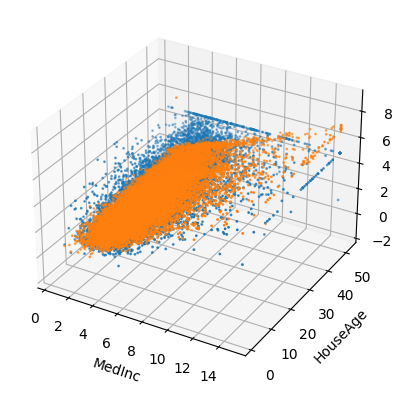

In [36]:
# 3D visualization

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X2.MedInc,X2.HouseAge, Y2, s=1)
ax.scatter(X2.MedInc, X2.HouseAge, reg2.predict(X2), s=1, cmap="YlOrRd")

ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value")
plt.show()

In [37]:
#vamos a probar el modelo con los datos de onlinefraud.csv

df = pd.read_csv("onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
